In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scFates
import scFates as scf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.9/419.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install scanpy scipy umap-learn leidenalg

In [4]:
!pip install git+https://github.com/pcahan1/oneSC.git@cscb24
!pip install git+https://github.com/pcahan1/PySingleCellNet/

  Cloning https://github.com/pcahan1/oneSC.git (to revision cscb24) to /tmp/pip-req-build-rwhygc65
  Running command git clone --filter=blob:none --quiet https://github.com/pcahan1/oneSC.git /tmp/pip-req-build-rwhygc65
  Running command git checkout -b cscb24 --track origin/cscb24
  Switched to a new branch 'cscb24'
  Branch 'cscb24' set up to track remote branch 'cscb24' from 'origin'.
  Resolved https://github.com/pcahan1/oneSC.git to commit 9b0bcef27daeab72e297ece546f57c63ed10820b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 906.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.5 MB/s eta 0:00:00
  Created wheel for onesc: filename=onesc-0.0.1-py3-none-any.whl size=31602 sha256=ba384969aae1484bfae9996c5e2195f6352e20b193e2ef466d3705542384a729
  Stored in directory: /tmp/pip-ephem-wheel-cache-2krsh2_1/wheels/61/7e/69/a121cfd148f1371833c1002bfa291d0a6383f7010dca1ee33c
Successfully built onesc
  Clon

In [5]:
#import necessary libraries
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import anndata
import onesc
import networkx as nx
import seaborn as sns
import os
import anndata
import scipy as sp
import pySingleCellNet as pySCN
from joblib import dump, load
import sys
import igraph as ig
from igraph import Graph
ig.config['plotting.backend'] = 'matplotlib'

## Import dataset, using both early and late stages  data

In [49]:

path_early = '/content/drive/MyDrive/Colab_24spring/stem cell biology/final project/adEarly_CSCB24.h5ad'
path_late ='/content/drive/MyDrive/Colab_24spring/stem cell biology/final project/adLate_Ectoderm.h5ad'

ad_early = sc.read(path_early)
ad_late = sc.read(path_late)



## Preprosessing of both datasets

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


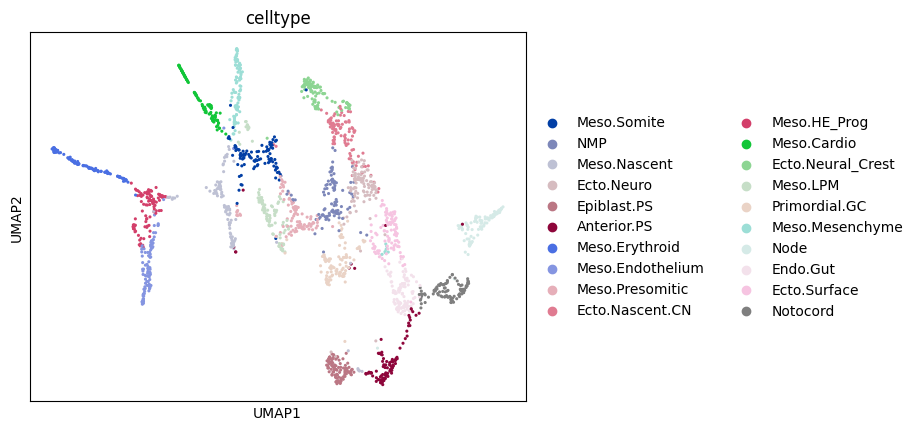

In [7]:
ad_early = ad_early.copy()
## Norm, HVG, PCA, kNN
sc.pp.normalize_total(ad_early , target_sum=1e4)
sc.pp.log1p(ad_early)
sc.pp.highly_variable_genes(ad_early , min_mean=0.0125, max_mean=6, min_disp=0.25)
ad_early = ad_early[:, ad_early.var.highly_variable]
sc.tl.pca(ad_early , use_highly_variable=True)

n_neighbors = 20
n_pcs = 10
sc.pp.neighbors(ad_early, n_neighbors=n_neighbors, n_pcs=n_pcs)


sc.tl.leiden(ad_early,resolution=0.1)
sc.tl.paga(ad_early)
sc.pl.paga(ad_early, plot=False)
sc.tl.umap(ad_early, min_dist=0.25, init_pos='paga')
sc.pl.umap(ad_early,color='celltype',s=20)

In [8]:
print(ad_late.obs.head())

                                 cell_id keep   day  embryo_id  \
4238   run_4_P2-02F.AAGCAGTATTTAGGCCATAG  yes  E8.5   embryo_7   
10456  run_4_P2-05C.ACTGGTTATTTTATTCTGAG  yes  E8.5  embryo_12   
12009  run_4_P2-05H.ATAAGCGAATTAACGAATTG  yes  E8.5  embryo_11   
13897   run_4_P2-06G.CGTCTTCCTCGGCGTAACT  yes  E8.5   embryo_3   
14731  run_4_P2-07B.AGCATAACTTACTATAGGTT  yes  E8.5  embryo_11   

      experimental_batch        major_trajectory  \
4238               run_4  Neuroectoderm_and_glia   
10456              run_4  Neuroectoderm_and_glia   
12009              run_4  Neuroectoderm_and_glia   
13897              run_4  Neuroectoderm_and_glia   
14731              run_4  Neuroectoderm_and_glia   

                        celltype_update file_origin  
4238   NMPs and spinal cord progenitors       part1  
10456                         Eye field       part1  
12009                         Eye field       part1  
13897                         Eye field       part1  
14731               

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


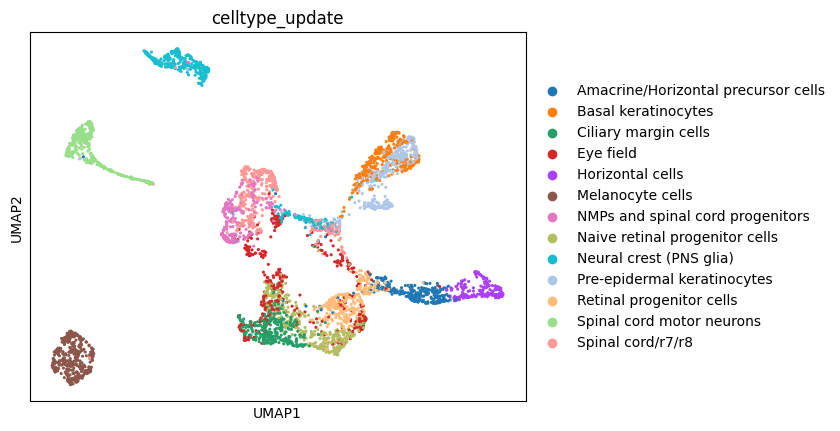

In [9]:
ad_late = ad_late.copy()
## Norm, HVG, PCA, kNN
sc.pp.normalize_total(ad_late , target_sum=1e4)
sc.pp.log1p(ad_late)
sc.pp.highly_variable_genes(ad_late , min_mean=0.0125, max_mean=6, min_disp=0.25)
ad_late = ad_late[:, ad_late.var.highly_variable]
sc.tl.pca(ad_late , use_highly_variable=True)

n_neighbors = 20
n_pcs = 10
sc.pp.neighbors(ad_late, n_neighbors=n_neighbors, n_pcs=n_pcs)


sc.tl.leiden(ad_late,resolution=0.1)
sc.tl.paga(ad_late)
sc.pl.paga(ad_late, plot=False)
sc.tl.umap(ad_late, min_dist=0.25, init_pos='paga')
sc.pl.umap(ad_late,color='celltype_update',s=20)

## Extract surface ectoderm and pre-epidermal keratinocytes and combine into one dataset

In [10]:
unique_celltypes = ad_early.obs['celltype'].unique()
for type in unique_celltypes:
  print(type)

Meso.HE_Prog
Endo.Gut
Meso.Mesenchyme
Meso.LPM
Meso.Presomitic
Meso.Somite
Primordial.GC
Node
Anterior.PS
Epiblast.PS
Ecto.Neuro
Meso.Nascent
Meso.Erythroid
NMP
Ecto.Surface
Notocord
Meso.Endothelium
Meso.Cardio
Ecto.Nascent.CN
Ecto.Neural_Crest


In [11]:
unique_celltypes = ad_late.obs['celltype_update'].unique()
for type in unique_celltypes:
  print(type)

NMPs and spinal cord progenitors
Eye field
Pre-epidermal keratinocytes
Neural crest (PNS glia)
Spinal cord/r7/r8
Spinal cord motor neurons
Naive retinal progenitor cells
Ciliary margin cells
Melanocyte cells
Amacrine/Horizontal precursor cells
Retinal progenitor cells
Basal keratinocytes
Horizontal cells


In [12]:
ad_late.obs.rename(columns={'celltype_update': 'celltype'}, inplace=True)


In [13]:

ecto_surface = ad_early[ad_early.obs['celltype']=='Ecto.Surface',:]
preep_kera = ad_late[ad_late.obs['celltype']=='Pre-epidermal keratinocytes',:]

adata2 = ecto_surface.concatenate(preep_kera,batch_key='combined_batch')

In [14]:
print(ecto_surface.obs.head())

                  cell  stage      celltype      cellid leiden
cell_11532  cell_11532  E7.75  Ecto.Surface  cell_11532      0
cell_12818  cell_12818  E7.75  Ecto.Surface  cell_12818      0
cell_16463  cell_16463  E7.75  Ecto.Surface  cell_16463      0
cell_18305  cell_18305  E7.75  Ecto.Surface  cell_18305      0
cell_18621  cell_18621  E7.75  Ecto.Surface  cell_18621      2


In [15]:
print(adata2.obs.head())

                    cell  stage      celltype      cellid leiden cell_id keep  \
cell_11532-0  cell_11532  E7.75  Ecto.Surface  cell_11532      0     NaN  NaN   
cell_12818-0  cell_12818  E7.75  Ecto.Surface  cell_12818      0     NaN  NaN   
cell_16463-0  cell_16463  E7.75  Ecto.Surface  cell_16463      0     NaN  NaN   
cell_18305-0  cell_18305  E7.75  Ecto.Surface  cell_18305      0     NaN  NaN   
cell_18621-0  cell_18621  E7.75  Ecto.Surface  cell_18621      2     NaN  NaN   

              day embryo_id experimental_batch major_trajectory file_origin  \
cell_11532-0  NaN       NaN                NaN              NaN         NaN   
cell_12818-0  NaN       NaN                NaN              NaN         NaN   
cell_16463-0  NaN       NaN                NaN              NaN         NaN   
cell_18305-0  NaN       NaN                NaN              NaN         NaN   
cell_18621-0  NaN       NaN                NaN              NaN         NaN   

             combined_batch  
cell_115

In [16]:
print(adata2.obs['celltype'].unique())

['Ecto.Surface', 'Pre-epidermal keratinocytes']
Categories (2, object): ['Ecto.Surface', 'Pre-epidermal keratinocytes']


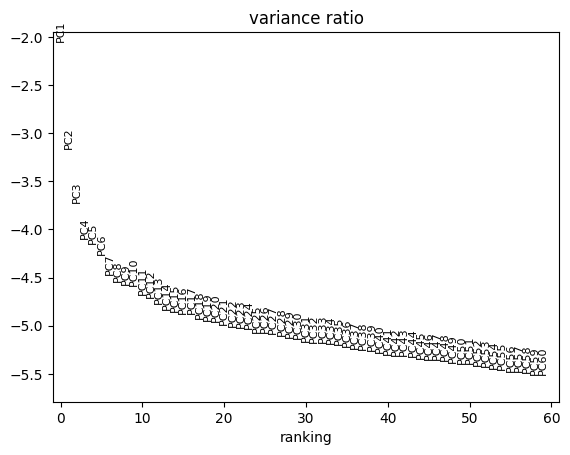

In [17]:
sc.tl.pca(adata2,n_comps = 60, svd_solver = 'arpack')
sc.pl.pca_variance_ratio(adata2,60, log=True)

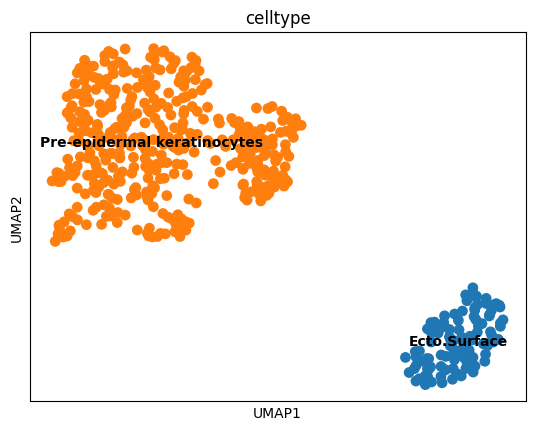

In [18]:
## do preprocessing again

## Norm, HVG, PCA, kNN


n_neighbors = 10
n_pcs = 16
sc.pp.neighbors(adata2, n_neighbors=n_neighbors, n_pcs=n_pcs)


sc.tl.leiden(adata2,resolution=0.1)
# sc.tl.paga(adata2)
# sc.pl.paga(adata2,plot=False)
sc.tl.umap(adata2, spread=1.0,min_dist=.5, random_state=11)
sc.pl.umap(adata2,color='celltype',legend_loc='on data')


## Assign pseudotime

inferring a principal tree --> parameters used 
    30 principal points, sigma = 0.9, lambda = 100, metric = euclidean
    fitting:  16%|█▌        | 16/100 [00:01<00:09,  8.85it/s]
    converged
    finished (0:00:01) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


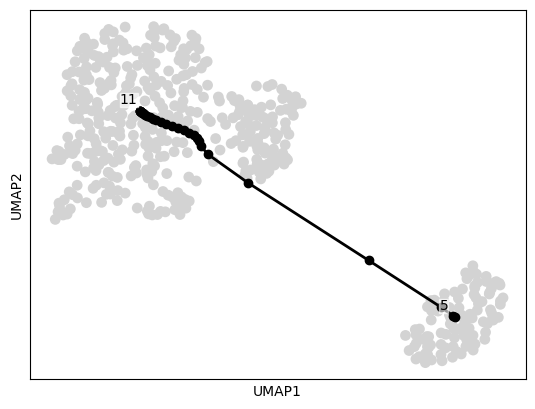

In [19]:
scf.tl.tree(adata2, use_rep='X_pca', method="ppt", Nodes=30, ppt_sigma=0.90,ppt_lambda=100,ppt_nsteps=100)
scf.pl.graph(adata2, basis = 'umap')

In [20]:
scf.tl.root(adata2,5)
scf.tl.pseudotime(adata2,seed=42) # assigns to each cell a pseudotime value

node 5 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


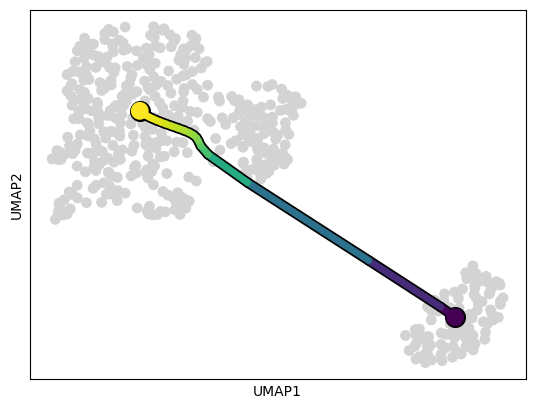

In [21]:
scf.pl.trajectory(adata2,basis='umap')


## Extract only TFs and perform DEG

In [22]:
# import the TF list
list = '/content/drive/MyDrive/Colab_24spring/stem cell biology/final project/allTFs_mm_aertslab_011924 (1).txt'
with open(list,'r') as file:
  tf_list = file.read().splitlines()

In [23]:
adata_tf = adata2.copy()
adata_tf = adata_tf[:, adata_tf.var_names.isin(tf_list)]

In [24]:
sc.tl.rank_genes_groups(adata_tf, 'celltype', method='t-test', n_genes=adata_tf.shape[1])

top_x_genes = 5

transcriptional_signatures = {}
for celltype in adata_tf.obs['celltype'].cat.categories:
    genes = adata_tf.uns['rank_genes_groups']['names'][celltype][:top_x_genes]
    transcriptional_signatures[celltype] = genes.tolist()
print(transcriptional_signatures)

{'Ecto.Surface': ['H1fx', 'Tagln2', 'Jund', 'Dlx5', 'Mycn'], 'Pre-epidermal keratinocytes': ['Trps1', 'Meis2', 'Tfap2b', 'Bcl11a', 'Lcorl']}


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


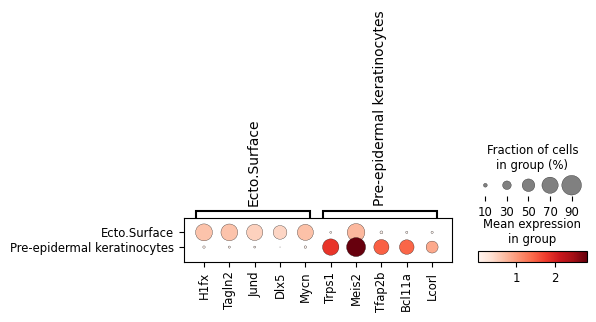

In [38]:
sc.pl.rank_genes_groups_dotplot(adata_tf, n_genes=top_x_genes,groupby='celltype',use_raw=False)

## Double check TF selection: use scFates to determine significant TFs

In [25]:
adata3 = adata2.copy()
scf.tl.test_association(adata3)
scf.tl.fit(adata3)

test features for association with the trajectory
    single mapping : 100%|██████████| 1101/1101 [01:24<00:00, 13.06it/s]
    found 74 significant features (0:01:24) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
fit features associated with the trajectory
    single mapping : 100%|██████████| 74/74 [00:06<00:00, 11.65it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:06) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [26]:
scf.tl.cluster(adata3)
adata3.var.clusters.unique()

Clustering features using fitted layer
    finished (0:00:00) --> added 
    .var['clusters'] identified modules.


['3', '2', '1', '0']
Categories (4, object): ['0', '1', '2', '3']

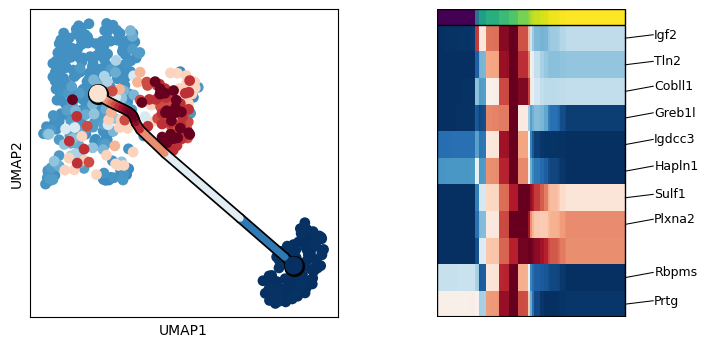

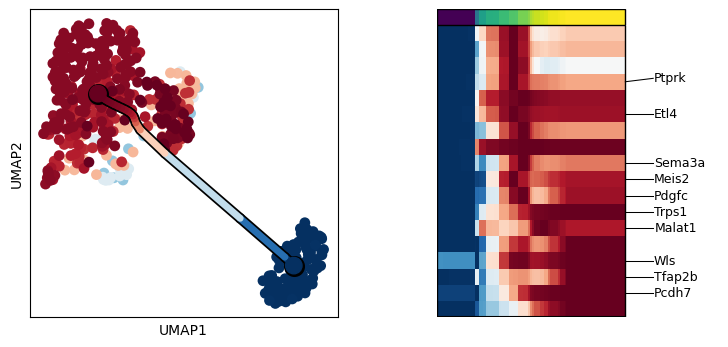

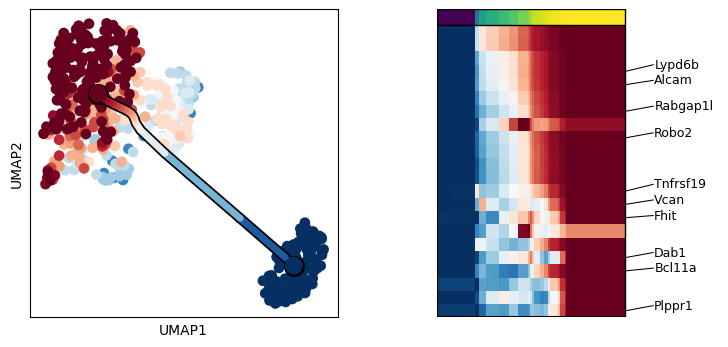

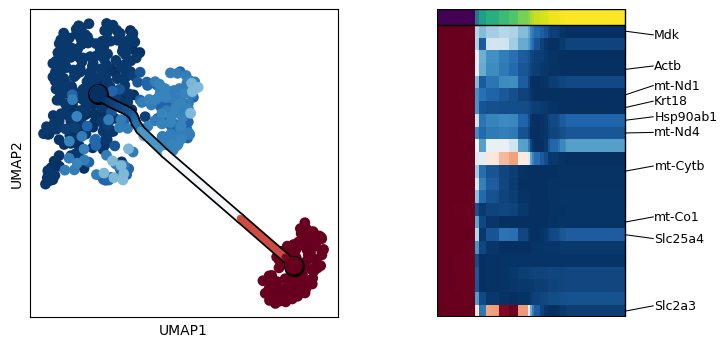

In [27]:
for c in adata3.var.clusters.unique():
  scf.pl.trends(adata3, features = adata3.var_names[adata3.var.clusters==c],basis='umap')

Significant TFs for Pre-epidermal keratinocytes identified by both methods: 'Trps1', 'Meis2', 'Tfap2b', 'Bcl11a'

## GRN Inference

In [28]:
# subset the data to include only the selected genes
tf = ['H1fx', 'Tagln2', 'Jund', 'Dlx5', 'Mycn','Trps1', 'Meis2', 'Tfap2b', 'Bcl11a', 'Lcorl']
adata_subset = adata_tf[:, tf]



In [29]:
# print(adata_subset.obs['celltype'].value_counts())

In [30]:
# subsampling to reduce total count of pre-epidermal keratinocytes to match that of ecto.surface
np.random.seed(42)

pre_keratocytes = adata_subset[adata_subset.obs['celltype'] == 'Pre-epidermal keratinocytes'].copy()

subsampled_keratocytes = pre_keratocytes[np.random.choice(pre_keratocytes.shape[0], 100, replace=False), :]

ecto_surface = adata_subset[adata_subset.obs['celltype'] == 'Ecto.Surface'].copy()
adata_subset = ecto_surface.concatenate(subsampled_keratocytes)

In [46]:
adTrain_rank, adHeldOut_rank = pySCN.splitCommonAnnData(adata_subset, ncells=150,dLevel="celltype")


Pre-epidermal keratinocytes : 
100
Ecto.Surface : 
100


In [47]:
clf = pySCN.train_rank_classifier(adTrain_rank, dLevel="celltype")


/usr/local/lib/python3.10/dist-packages/numpy/lib/shape_base.py:400: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  buff[ind0] = res
/usr/local/lib/python3.10/dist-packages/numpy/lib/shape_base.py:402: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


/usr/local/lib/python3.10/dist-packages/numpy/lib/shape_base.py:400: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  buff[ind0] = res
/usr/local/lib/python3.10/dist-packages/numpy/lib/shape_base.py:402: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


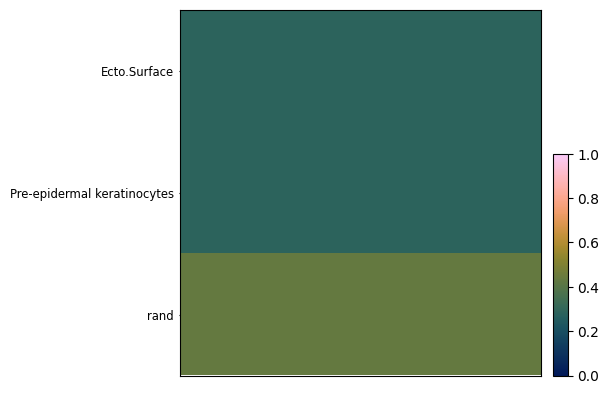

In [48]:
pySCN.rank_classify(adHeldOut_rank, clf)
pySCN.heatmap_scores(adHeldOut_rank, groupby='SCN_class')

In [34]:
initial_clusters = ['Ecto.Surface']
end_clusters = ["Pre-epidermal keratinocytes"]

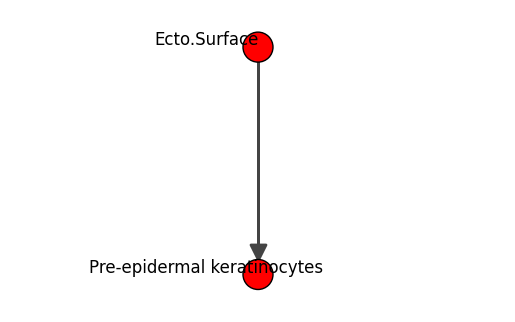

In [35]:
state_path = onesc.construct_cluster_graph_adata(adata_subset,
                                                 initial_clusters = initial_clusters,
                                                 terminal_clusters = end_clusters,
                                                 cluster_col = "celltype",
                                                 pseudo_col = "t")
onesc.plot_state_graph(state_path)

In [36]:
start_end_states = {'start': ['Ecto.Surface'], 'end':["Pre-epidermal keratinocytes"]}

iGRN = onesc.infer_grn(state_path,
                       start_end_states,
                       adata_subset,
                       num_generations = 20,
                       sol_per_pop = 30,
                       reduce_auto_reg=True,
                       ideal_edges = 0,
                       GA_seed_list = [1, 3],
                       init_pop_seed_list = [21, 25],
                       cluster_col='celltype',
                       pseudoTime_col='t')

grn_ig = onesc.dataframe_to_igraph(iGRN)
onesc.plot_grn(grn_ig, layout_method='fr',community_first=True)

Preparing states and data for GA ...


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

## KO

In [ ]:
adDef = adata_subset[adata_subset.obs['celltype'] == 'Ecto.Surface'].copy()
xstates = onesc.define_states_adata(adDef, min_mean = 0.05, min_percent_cells = 0.20) * 2


In [ ]:
netname = 'DefinitiveEctoDiff'
netsim = onesc.network_structure()
netsim.fit_grn(iGRN)
sim = onesc.OneSC_simulator()
sim.add_network_compilation(netname, netsim)